# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [37]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [38]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [39]:
#  1. Get the total rides for each city type
total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [40]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [41]:
#  3. Get the total amount of fares for each city type
total_fare_amount = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_amount

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [42]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = total_fare_amount/total_ride_count
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [43]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fare_amount/total_drivers_by_type
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [44]:
#  6. Create a PyBer summary DataFrame.
city_types = pyber_data_df.set_index(["city"])["type"]

city_types_df=pd.DataFrame(city_types)
pyber_summary_df = pd.DataFrame({
                    "Total Rides": total_ride_count,
                    "Total Drivers": total_drivers_by_type, 
                    "Total Fares": total_fare_amount,
                    "Average Fare per Ride": average_fare_per_ride,
                    "Average Fare per Driver": average_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [45]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [46]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [63]:
# 1. Read the merged DataFrame
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [64]:
#pyber_data_df.info()

In [65]:
# Add a date column so that the sum of fares by date and type can be accomplished.
# KEEP THIS: 
pyber_data_df['date'] = pd.to_datetime(pyber_data_df['date'])
#pyber_data_df['the_date'] = pyber_data_df['date'].dt.date <== This yields another column with only the date.
#pyber_data_df
#pyber_data_df.info()

In [66]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date-time where the indices are the city type and the_date.

#pyber_sum_fares_by_type_date_df = pyber_data_df.groupby(["the_date","type"]).sum()["fare"]<== this will yield the DATE not DATETIME
#pyber_sum_fares_by_type_date_df.head(10)
pyber_sum_fares_by_type_date_df = pyber_data_df.groupby(["date","type"]).sum()["fare"]
pyber_sum_fares_by_type_date_df.head(10)

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
2019-01-01 09:45:36  Rural       43.69
2019-01-01 12:32:48  Suburban    25.56
2019-01-01 14:40:14  Urban        5.42
2019-01-01 14:42:25  Urban       12.31
2019-01-01 14:52:06  Suburban    31.15
Name: fare, dtype: float64

In [67]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_sum_fares_by_type_date_df = pyber_sum_fares_by_type_date_df.reset_index()
pyber_sum_fares_by_type_date_df.head(10)

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
5,2019-01-01 09:45:36,Rural,43.69
6,2019-01-01 12:32:48,Suburban,25.56
7,2019-01-01 14:40:14,Urban,5.42
8,2019-01-01 14:42:25,Urban,12.31
9,2019-01-01 14:52:06,Suburban,31.15


In [68]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.
# ---------------------------------------------------------------------------------
# Syntax: 
# pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', 
#                    fill_value=None, margins=False, dropna=True, 
#                    margins_name='All', observed=False)
# ---------------------------------------------------------------------------------
pyber_sum_fares_by_type_date_pivot = pd.pivot_table(pyber_sum_fares_by_type_date_df, 
                                                    index= 'date',
                                                    columns = 'type',
                                                    values= "fare",
                                                    aggfunc='sum')
pyber_sum_fares_by_type_date_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [69]:
# pyber_sum_fares_by_type_date_pivot.index

In [70]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
from datetime import datetime
pyber_sum_fares_date_range = pyber_sum_fares_by_type_date_pivot.loc[(pyber_sum_fares_by_type_date_pivot.index >= datetime(2019,1,1)) & (pyber_sum_fares_by_type_date_pivot.index <= datetime(2019,4,29)), ['Rural','Suburban','Urban']]
pyber_sum_fares_date_range

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [71]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# This worked with other commented steps above...but soon after this, my plan fell apart. ;)
#pyber_sum_fares_dates_df = pyber_sum_fares_by_type_date_pivot.loc['2019-01-01 00:00:00':'2019-04-29 23:59:59'],['Rural','Suburban','Urban']
#pyber_sum_fares_dates_df

In [72]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_sum_fares_date_range.index = pd.to_datetime(pyber_sum_fares_date_range.index)  
pyber_sum_fares_date_range
#pyber_sum_fares_by_type_date_pivot.index = pd.to_datetime(pyber_sum_fares_by_type_date_pivot.index)  
#pyber_sum_fares_by_type_date_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [73]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_sum_fares_date_range.info()
#pyber_sum_fares_by_type_date_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [74]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

pyber_sum_fares_week = pyber_sum_fares_date_range.resample("W").sum()
#pyber_sum_fares_week = pyber_sum_fares_by_type_date_pivot.resample("W").sum()
                       
pyber_sum_fares_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


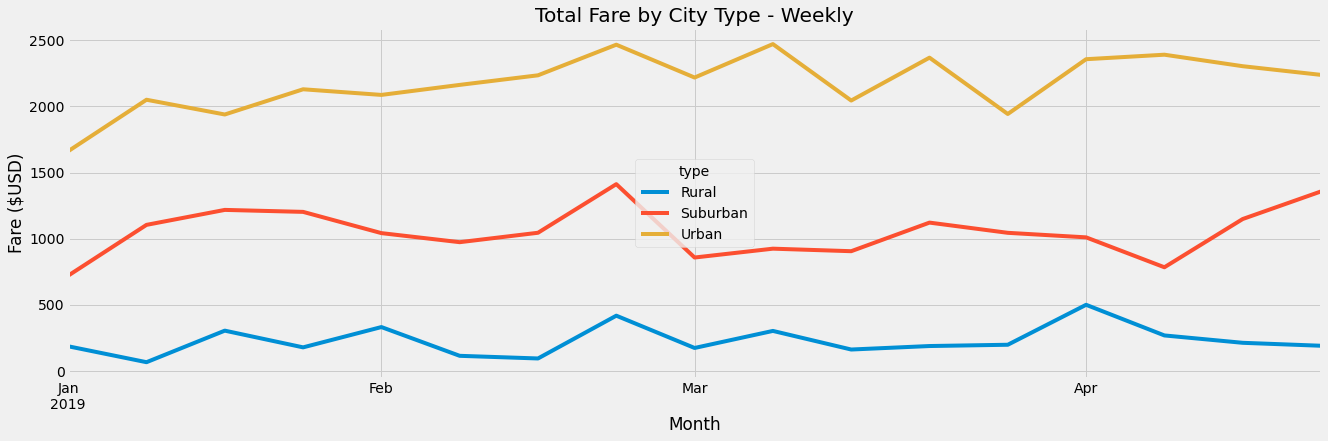

In [75]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# create plot using object-oriented interface method

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = pyber_sum_fares_week.plot(figsize = (20,6))

# Add a title
ax.set_title("Total Fare by City Type - Weekly")

# Add the x and y axis label
ax.set_xlabel("Month")
ax.set_ylabel("Fare ($USD)")

plt.savefig("analysis/Challenge_Fare_Summary.png")